# Train the model

In [3]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import load_model
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../functions')
from ipynb.fs.full.models import regression


trial information:
- pure signals, without noise
- uniformly scaled
- mass sampled with respect to chirp mass and eta

# Load data

In [4]:
# load main regression data 
f_path = 'r_data_1A.h5'
X = pd.read_hdf(f_path, 'X')
y = pd.read_hdf(f_path, 'y')

In [7]:
# Data preprocessing

# uniformly scale data
X_scaled=X*(10**22)

# Train test split with sklearn
X_train,X_test,y_train,y_test = train_test_split(X_scaled.values,y.values,test_size=0.1,random_state=13)

# save test set
f_path = 'r_testdata_1A.h5'
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)
X_test_df.to_hdf(f_path, key='X', mode='w')
y_test_df.to_hdf(f_path, key='y')

C:\Users\Ruining\.conda\envs\machine_learning\lib\site-packages\pandas\core\generic.py:2531: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->floating,key->block0_values] [items->[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167

In [8]:
# Reshape data
Xtrain = []
for i in np.arange(len(X_train)):
    h = X_train[i].reshape(4096,1)
    Xtrain.append(h)
X_train = np.asarray(Xtrain)

Xtest = []
for i in np.arange(len(X_test)):
    h = X_test[i].reshape(4096,1)
    Xtest.append(h)
X_test = np.asarray(Xtest)

# Train

In [9]:
# Build model
model = regression()
# print(model.summary())

# compile model
ad = optimizers.Adam(lr=0.00005)
model.compile(loss='mae', optimizer=ad, metrics=['mse','mae'])

# Pre_train score record
pre_score = model.evaluate(X_test, y_test, verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
1510/1510 [==============================] - 5s 3ms/step


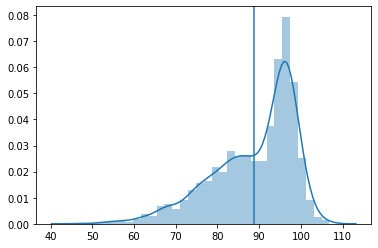

Mean %difference: 88.82910137897086
Standard deviation of %difference: 9.911726694017396


In [10]:
# predict before training
preds_bf = model.predict(X_test)
 
# compute the difference between the *predicted* and *actual* 
# then compute the percentage difference and the absolute percentage difference
diff_bf = preds_bf.flatten() - y_test.flatten()
percentDiff_bf = (diff_bf / y_test.flatten()) * 100
absPercentDiff_bf = np.abs(percentDiff_bf)
 
# compute the mean and standard deviation of the absolute percentage
# difference
mean_bf = np.mean(absPercentDiff_bf)
std_bf = np.std(absPercentDiff_bf)

sns.distplot(absPercentDiff_bf)
plt.axvline(mean_bf, 0,1)
plt.show()

print("Mean %difference:",mean_bf)
print("Standard deviation of %difference:",std_bf)



In [11]:
# Save the raw regression Network
model.save('regression0.h5')  # creates a HDF5 file 'my_model.h5'

In [12]:
epoch = 200
batch_size = 5

earlystopping_callback = EarlyStopping(monitor='mean_squared_error',verbose=1,min_delta=0.5,patience=40,baseline=None)

history = model.fit(X_train, y_train, validation_split = 0.20, batch_size=batch_size, epochs=epoch, verbose=1,
                   callbacks=[earlystopping_callback])

Instructions for updating:
Use tf.cast instead.
Train on 10872 samples, validate on 2718 samples
Epoch 1/200
10872/10872 [==============================] - 21s 2ms/step - loss: 9.0755 - mean_squared_error: 195.9927 - mean_absolute_error: 9.0755 - val_loss: 7.6489 - val_mean_squared_error: 136.1764 - val_mean_absolute_error: 7.6489
Epoch 2/200
10872/10872 [==============================] - 20s 2ms/step - loss: 4.9017 - mean_squared_error: 63.8592 - mean_absolute_error: 4.9017 - val_loss: 2.7950 - val_mean_squared_error: 17.3037 - val_mean_absolute_error: 2.7950
Epoch 3/200
10872/10872 [==============================] - 21s 2ms/step - loss: 2.5158 - mean_squared_error: 14.2077 - mean_absolute_error: 2.5158 - val_loss: 2.2360 - val_mean_squared_error: 10.6988 - val_mean_absolute_error: 2.2360
Epoch 4/200
10872/10872 [==============================] - 21s 2ms/step - loss: 2.0618 - mean_squared_error: 9.5489 - mean_absolute_error: 2.0618 - val_loss: 1.7677 - val_mean_squared_error: 7.2175 -

Epoch 35/200
10872/10872 [==============================] - 20s 2ms/step - loss: 0.6777 - mean_squared_error: 0.9793 - mean_absolute_error: 0.6777 - val_loss: 0.6497 - val_mean_squared_error: 0.9725 - val_mean_absolute_error: 0.6497
Epoch 36/200
10872/10872 [==============================] - 20s 2ms/step - loss: 0.6718 - mean_squared_error: 0.9825 - mean_absolute_error: 0.6718 - val_loss: 0.6786 - val_mean_squared_error: 1.0339 - val_mean_absolute_error: 0.6786
Epoch 37/200
10872/10872 [==============================] - 20s 2ms/step - loss: 0.6518 - mean_squared_error: 0.9186 - mean_absolute_error: 0.6518 - val_loss: 0.6309 - val_mean_squared_error: 0.9669 - val_mean_absolute_error: 0.6309
Epoch 38/200
10872/10872 [==============================] - 20s 2ms/step - loss: 0.6735 - mean_squared_error: 0.9802 - mean_absolute_error: 0.6735 - val_loss: 0.8708 - val_mean_squared_error: 1.6278 - val_mean_absolute_error: 0.8708
Epoch 39/200
10872/10872 [==============================] - 20s 2ms/

# Save

In [13]:
# Save model
model.save('regression1A.h5')  # creates a HDF5 file 'my_model.h5'

import h5py
# save history
h = h5py.File('../history/r_his_1A.h5')
d = history.history
for k, v in d.items():
    h.create_dataset(k, data=np.array(v, dtype=np.float32))

# Training history

dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'loss', 'mean_squared_error', 'mean_absolute_error'])


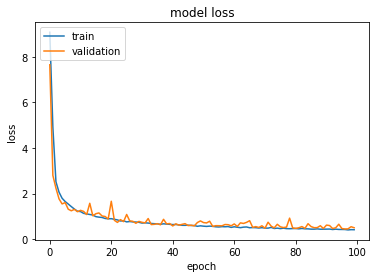

In [15]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Histograms

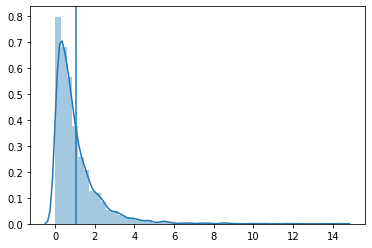

Mean %difference: 1.046589795477722
Standard deviation of %difference: 1.1660575757170817


In [14]:
# histogram for both m1,m2

preds = model.predict(X_test)
 
# compute the difference between the *predicted* and *actual* 
# then compute the percentage difference and the absolute percentage difference
diff = preds.flatten() - y_test.flatten()
percentDiff = (diff / y_test.flatten()) * 100
absPercentDiff = np.abs(percentDiff)
 
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

sns.distplot(absPercentDiff)
plt.axvline(mean, 0,1)
plt.show()

print("Mean %difference:",mean)
print("Standard deviation of %difference:",std)

In [33]:
# Transfer m1,m2 to chirp mass and eta for y_test

M_actual = []
eta_actual = []

for p in y_test:
    m1 = p[0]
    m2 = p[1]
    M = (m1*m2)**(3/5)/(m1+m2)**(1/5)
    M_actual.append(M)
    e = (m1*m2)/(m1+m2)**2
    eta_actual.append(e)

M_actual = np.asarray(M_actual)
eta_actual = np.asarray(eta_actual)   
    
# Transfer m1,m2 to chirp mass and eta for prediction
M_preds = []
eta_preds = []
for p in preds:
    m1 = p[0]
    m2 = p[1]
    M = (m1*m2)**(3/5)/(m1+m2)**(1/5)
    M_preds.append(M)
    e = (m1*m2)/(m1+m2)**2
    eta_preds.append(e)
    
M_preds = np.asarray(M_preds)
eta_preds = np.asarray(eta_preds)

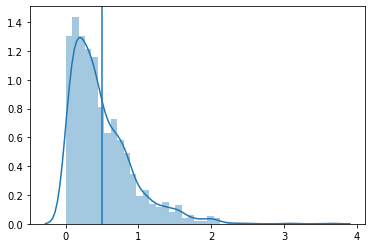

Mean %difference: 0.49258696996640344
Standard deviation of %difference: 0.42180035672538946


In [35]:
# Chirp mass histogram

# compute the difference between the *predicted* and *actual* 
# then compute the percentage difference and the absolute percentage difference
M_diff = M_preds - M_actual
M_percentDiff = (M_diff / M_actual) * 100
M_absPercentDiff = np.abs(M_percentDiff)
 
# compute the mean and standard deviation of the absolute percentage
# difference
M_mean = np.mean(M_absPercentDiff)
M_std = np.std(M_absPercentDiff)

sns.distplot(M_absPercentDiff)
plt.axvline(M_mean, 0,1)
plt.show()

print("Mean %difference:",M_mean)
print("Standard deviation of %difference:",M_std)

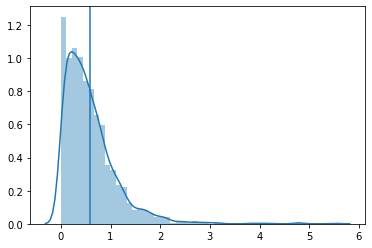

Mean %difference: 0.5892498089477245
Standard deviation of %difference: 0.5355795902112948


In [36]:
# Eta histogram

# compute the difference between the *predicted* and *actual* 
# then compute the percentage difference and the absolute percentage difference
eta_diff = eta_preds - eta_actual
eta_percentDiff = (eta_diff / eta_actual) * 100
eta_absPercentDiff = np.abs(eta_percentDiff)
 
# compute the mean and standard deviation of the absolute percentage
# difference
eta_mean = np.mean(eta_absPercentDiff)
eta_std = np.std(eta_absPercentDiff)

sns.distplot(eta_absPercentDiff)
plt.axvline(eta_mean, 0,1)
plt.show()

print("Mean %difference:",eta_mean)
print("Standard deviation of %difference:",eta_std)

# Select cases that have a larger percentage difference in chirp mass 

In [50]:
count = 0
percentage_cut = 2

percent = []
badmass = []

for i in np.arange(len(M_absPercentDiff)):
    if M_absPercentDiff[i] > percentage_cut:
        count += 1
        badmass.append(y_test[i])
        percent.append(M_absPercentDiff[i])
        print()
        print("Absolute Percent Difference for chirp mass: ",M_absPercentDiff[i])
        print("Actual masses: ",y_test[i])
        print("Predicted masses: ",preds[i])

print()
print("A total number of ", count, " predictions have above ", percentage_cut, " absolute percent difference.")


Absolute Percent Difference for chirp mass:  2.0703366587614775
Actual masses:  [10.75635955 15.48436927]
Predicted masses:  [11.244593 14.148834]

Absolute Percent Difference for chirp mass:  2.1187264316794967
Actual masses:  [35.82465571 66.83108416]
Predicted masses:  [34.92683 65.7088 ]

Absolute Percent Difference for chirp mass:  2.0431367862228753
Actual masses:  [39.04376102 54.13417451]
Predicted masses:  [38.829487 52.181   ]

Absolute Percent Difference for chirp mass:  2.468384485564116
Actual masses:  [16.41413942 86.45951594]
Predicted masses:  [16.98371 87.46878]

Absolute Percent Difference for chirp mass:  2.1000995732969563
Actual masses:  [61.70684263 69.06803438]
Predicted masses:  [57.234905 71.50091 ]

Absolute Percent Difference for chirp mass:  3.088269654372464
Actual masses:  [69.84242693 99.54621856]
Predicted masses:  [67.64292 96.53712]

Absolute Percent Difference for chirp mass:  2.280561991698428
Actual masses:  [ 13.09418196 100.31908893]
Predicted ma

In [48]:
# make panda dataframe
summary = pd.DataFrame(badmass,columns = ["m1","m2"])
summary['percentage'] = percent

Blues = plt.get_cmap('Blues')
norm = [float(i)/max(percent) for i in percent]
colors = [Blues(c) for c in norm]

summary['colors']=colors

# For stage 1B data generation

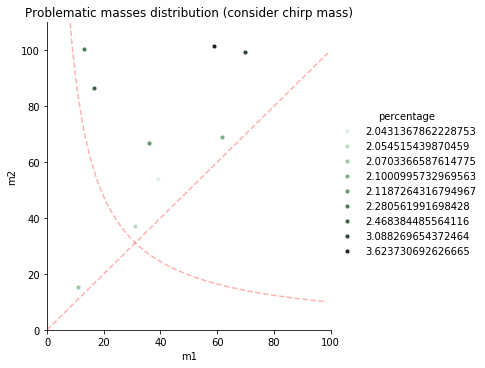

In [51]:
# Summary for training data 1B:

sns.lmplot(x="m1", y="m2",
           hue="percentage",
           data = summary,
           fit_reg=False,
           scatter_kws={"marker": "D",
                        "s": 10},
           palette = sns.cubehelix_palette(len(colors), start=2, rot=0, dark=0, light=.9))

plt.plot(np.arange(100),'r--',alpha=0.3)
plt.plot(1000/np.arange(1,100),'r--',alpha=0.3)

plt.title('Problematic masses distribution (consider chirp mass)')
plt.xlabel('m1')
plt.ylabel('m2')
plt.ylim(0,110)
plt.xlim(0,100)
plt.show()